In [ ]:
!pip install seaborn
!pip install datascience
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from datascience import *
import matplotlib
%matplotlib inline

In [ ]:
#https://data.world/gmoney/nba-rookies-by-min-1980-2016/workspace/file?filename=NBA+Rookies+by+Year_Hall+of+Fame+Class.xlsx
rookies = pd.read_csv('nbaRookie.csv')

#https://data.world/bgp12/nbancaacomparisons/workspace/file?filename=players.csv
ncaa = pd.read_csv('ncaa.csv')

roty = pd.read_csv('RookieOfTheYear.csv')
mvp = pd.read_csv('MVP.csv')
dpoy = pd.read_csv('DPOY.csv')
namefmvp = pd.read_csv('FMVP.csv')

rookies.dropna(subset=['Name'], inplace=True)
rookies.Name.unique()

ncaa.dropna(subset=['name'], inplace=True)
len(ncaa.name.unique())

4526

In [ ]:
ncaa = ncaa.rename(columns = {"name": "Name", "active_from": "Year Drafted"})
rookies2 = rookies.copy()
rookies2["Year Drafted"] += 1
merged =pd.merge(rookies2, ncaa, how = "inner", on = ["Name", "Year Drafted"])

merged['Hall of Fame Class'].fillna(0, inplace=True)
merged['Hall of Fame Class'] = merged['Hall of Fame Class'].mask(merged['Hall of Fame Class'].ne(0)).fillna(1)
merged = merged.drop(columns = ["Year Drafted", "Unnamed: 0", "active_to", "birth_date", "college", "height", "url", "weight", "NCAA_efgpct", "position"])
merged['3P%'] = pd.to_numeric(merged['3P%'].mask(merged['3P%'] == '-'))

merged
for column, series in merged.iteritems():
    if column != 'Name':
        merged[column].fillna(value=merged[column].mean(), inplace=True)
merged

,Name,Hall of Fame Class,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,NCAA__3ptpct,NCAA__3ptpg,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,Jeff Taylor,0.0,44.0,17.6,3.6,1.5,3.6,40.0,0.0,0.0,...,0.327248,0.868222,9.600000,0.509000,4.900000,0.779000,3.400000,2.600000,115.000000,12.400000
1,Charles Smith,0.0,71.0,30.4,16.3,6.1,12.4,49.5,0.0,0.0,...,0.273000,0.000000,11.600000,0.500000,5.800000,0.753000,6.800000,5.100000,122.000000,16.800000
2,Mark Davis,0.0,33.0,7.8,3.8,1.5,3.1,48.0,0.0,0.3,...,0.327248,0.868222,7.700000,0.501000,3.900000,0.751000,2.300000,1.700000,110.000000,9.400000
3,Charles Smith,0.0,60.0,8.7,2.9,1.0,2.2,44.4,0.0,0.1,...,0.371000,1.100000,8.800000,0.457000,4.000000,0.754000,3.000000,2.300000,126.000000,11.100000
4,Michael Smith,0.0,65.0,9.5,5.0,2.1,4.4,47.6,0.0,0.4,...,0.430000,1.200000,14.300000,0.507000,7.300000,0.878000,4.000000,3.500000,122.000000,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,Rodney McGruder,0.0,30.0,25.7,5.8,2.1,5.3,40.0,0.8,2.6,...,0.381000,1.400000,9.300000,0.452000,4.200000,0.759000,2.500000,1.900000,135.000000,11.700000
1485,Semaj Christon,0.0,33.0,15.6,3.0,1.3,4.0,31.8,0.2,1.1,...,0.338000,0.400000,12.300000,0.462000,5.700000,0.670000,6.600000,4.400000,64.000000,16.200000
1486,Tomas Satoransky,0.0,23.0,14.7,3.1,1.3,3.2,39.7,0.1,0.8,...,0.327248,0.868222,10.251603,0.500844,5.091243,0.713353,4.148944,2.970133,99.591087,13.821267
1487,Troy Williams,0.0,24.0,17.4,5.3,2.1,5.1,41.8,0.4,1.7,...,0.325000,0.400000,8.000000,0.522000,4.200000,0.705000,3.600000,2.600000,99.000000,11.300000


<AxesSubplot:>

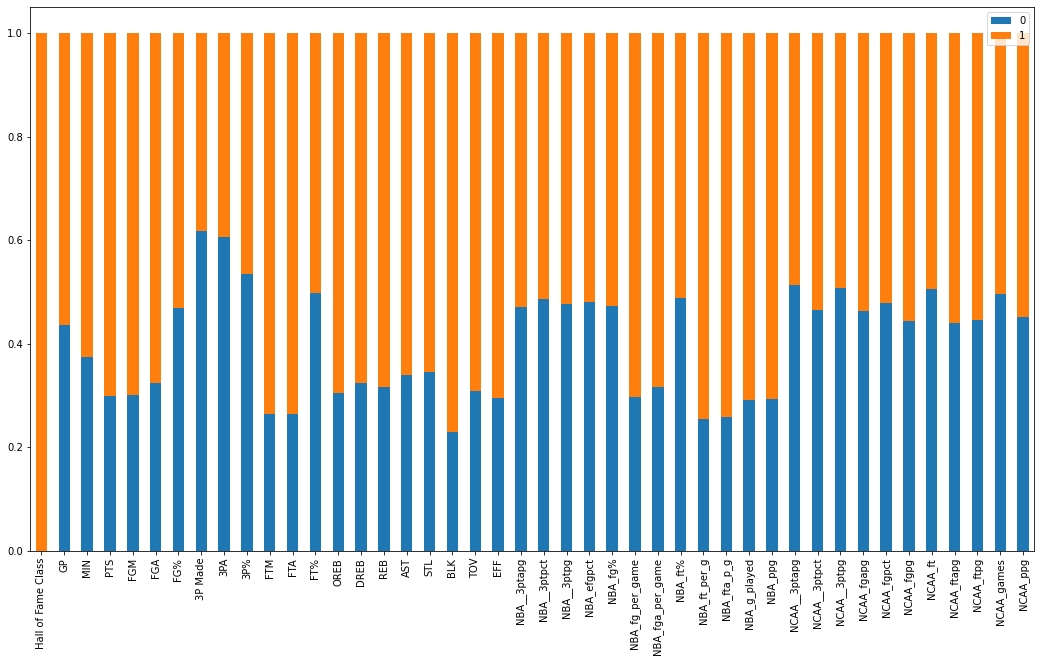

In [ ]:
noname = merged.drop(columns = ["Name"])
noname = noname.groupby(['Hall of Fame Class'], as_index=False).mean()

# for (columnName, columnData) in noname.iteritems():
#     ax = sns.barplot(x="Hall of Fame Class", y=columnName, data=noname)
# # sns.barplot(x="Hall of Fame Class", y="PTS", data=noname)

for (columnName, columnData) in noname.iteritems():
    noname[columnName] = noname[columnName]/noname[columnName].sum() 
transpose = noname.transpose()
transpose.plot.bar(stacked=True,figsize=(18,10))





In [ ]:
withAwards = merged.join(roty.set_index('Name'), on='Name')
withAwards = withAwards.join(dpoy.set_index('Name'), on='Name')
withAwards = withAwards.join(mvp.set_index('Name'), on='Name')
withAwards = withAwards.join(namefmvp.set_index('Name'), on='Name')

withAwards['Rookie of the Year'] = withAwards['Rookie of the Year'].fillna(0)
withAwards['MVP'] = withAwards['MVP'].fillna(0)
withAwards['FMVP'] = withAwards['FMVP'].fillna(0)
withAwards['DPOY'] = withAwards['DPOY'].fillna(0)
withAwards


,Name,Hall of Fame Class,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,Rookie of the Year,DPOY,MVP,FMVP
0,Jeff Taylor,0.0,44.0,17.6,3.6,1.5,3.6,40.0,0.0,0.0,...,4.900000,0.779000,3.400000,2.600000,115.000000,12.400000,0.0,0.0,0.0,0.0
1,Charles Smith,0.0,71.0,30.4,16.3,6.1,12.4,49.5,0.0,0.0,...,5.800000,0.753000,6.800000,5.100000,122.000000,16.800000,0.0,0.0,0.0,0.0
2,Mark Davis,0.0,33.0,7.8,3.8,1.5,3.1,48.0,0.0,0.3,...,3.900000,0.751000,2.300000,1.700000,110.000000,9.400000,0.0,0.0,0.0,0.0
3,Charles Smith,0.0,60.0,8.7,2.9,1.0,2.2,44.4,0.0,0.1,...,4.000000,0.754000,3.000000,2.300000,126.000000,11.100000,0.0,0.0,0.0,0.0
4,Michael Smith,0.0,65.0,9.5,5.0,2.1,4.4,47.6,0.0,0.4,...,7.300000,0.878000,4.000000,3.500000,122.000000,19.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,Rodney McGruder,0.0,30.0,25.7,5.8,2.1,5.3,40.0,0.8,2.6,...,4.200000,0.759000,2.500000,1.900000,135.000000,11.700000,0.0,0.0,0.0,0.0
1485,Semaj Christon,0.0,33.0,15.6,3.0,1.3,4.0,31.8,0.2,1.1,...,5.700000,0.670000,6.600000,4.400000,64.000000,16.200000,0.0,0.0,0.0,0.0
1486,Tomas Satoransky,0.0,23.0,14.7,3.1,1.3,3.2,39.7,0.1,0.8,...,5.091243,0.713353,4.148944,2.970133,99.591087,13.821267,0.0,0.0,0.0,0.0
1487,Troy Williams,0.0,24.0,17.4,5.3,2.1,5.1,41.8,0.4,1.7,...,4.200000,0.705000,3.600000,2.600000,99.000000,11.300000,0.0,0.0,0.0,0.0


In [ ]:
#Trying to drop rows where players are active in under 2013 since need to be 3 years retired to be eligible for HoF and our HoF dataset ends at 2016 so 2016 - 3
ncaa2 = ncaa.copy()
hofEligible = ncaa2[ncaa2["active_to"] <= 2013]
merged2 = pd.merge(rookies2, hofEligible, how="inner", on=["Name", "Year Drafted"])

merged2['Hall of Fame Class'].fillna(0, inplace=True)
merged2['Hall of Fame Class'] = merged2['Hall of Fame Class'].mask(merged2['Hall of Fame Class'].ne(0)).fillna(1)
merged2 = merged2.drop(columns = ["Year Drafted", "Unnamed: 0", "active_to", "birth_date", "college", "height", "url", "weight", "NCAA_efgpct", "position"])
merged2['3P%'] = pd.to_numeric(merged2['3P%'].mask(merged2['3P%'] == '-'))

for column, series in merged2.iteritems():
    if column != 'Name':
        merged2[column].fillna(value=merged2[column].mean(), inplace=True)
merged2

withAwards2 = merged2.join(roty.set_index('Name'), on='Name')
withAwards2 = withAwards2.join(dpoy.set_index('Name'), on='Name')
withAwards2 = withAwards2.join(mvp.set_index('Name'), on='Name')
withAwards2 = withAwards2.join(namefmvp.set_index('Name'), on='Name')

withAwards2['Rookie of the Year'] = withAwards2['Rookie of the Year'].fillna(0)
withAwards2['MVP'] = withAwards2['MVP'].fillna(0)
withAwards2['FMVP'] = withAwards2['FMVP'].fillna(0)
withAwards2['DPOY'] = withAwards2['DPOY'].fillna(0)
withAwards2


In [ ]:
hallOfFamers = withAwards.loc[merged["Hall of Fame Class"] == 1]
nonHallOfFamers = withAwards.loc[merged["Hall of Fame Class"] == 0]

#mergedWithRewards = pd.merge(merged, mvp, how="left", on = ["Name"])
#mergedWithRewards = pd.merge(mergedWithRewards, roty, how="left", on = ["Name"])
#mergedWithRewards = pd.merge(mergedWithRewards, dpoy, how="left", on = ["Name"])

#mergedWithRewards['MVP'].fillna(0, inplace=True)
#mergedWithRewards['DPOY'].fillna(0, inplace=True)
#mergedWithRewards['Rookie of the Year'].fillna(0, inplace=True)
#mergedWithRewards

<AxesSubplot:xlabel='DPOY', ylabel='Count'>

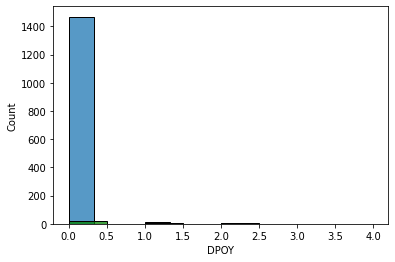

In [ ]:
sns.histplot(withAwards["DPOY"])
sns.histplot(hallOfFamers["DPOY"], color="Green")

In [ ]:
HallOfFamersStat = hallOfFamers["PTS"] + hallOfFamers["REB"] + hallOfFamers["AST"] + hallOfFamers["STL"] + hallOfFamers["BLK"]
sns.histplot(nonHallOfFamersStat, label="HoF", color="Green")

NameError: name 'nonHallOfFamersStat' is not defined

In [ ]:
sns.scatterplot(nonHallOfFamers["EFF"], nonHallOfFamers["PTS"], color="Blue")
sns.scatterplot(hallOfFamers["EFF"], hallOfFamers["PTS"], color="Red")

In [ ]:
# plt.scatter(hallOfFamers["NCAA_ppg"], hallOfFamers["PTS"])
# plt.xlabel("PPG in College")
# plt.ylabel("PTS in NBA")
sns.regplot(hallOfFamers["NCAA_ppg"], hallOfFamers["PTS"])
m,b = np.polyfit(hallOfFamers["NCAA_ppg"], hallOfFamers["PTS"], 1)
print(m,b)

In [ ]:
# plt.scatter(nonHallOfFamers["NCAA_ppg"], nonHallOfFamers["PTS"])
# plt.xlabel("PPG in College")
# plt.ylabel("PTS in NBA")
sns.regplot(nonHallOfFamers["NCAA_ppg"], nonHallOfFamers["PTS"])
m,b = np.polyfit(nonHallOfFamers["NCAA_ppg"], nonHallOfFamers["PTS"], 1)
print(m,b)

In [ ]:
sns.histplot(nonHallOfFamers["EFF"], label="Not HoF", color="Blue")
sns.histplot(hallOfFamers["EFF"], label="HoF", color="Orange")

In [ ]:
sns.histplot(nonHallOfFamers["NBA_efgpct"], label="Not HOF", color="Blue")
sns.histplot(hallOfFamers["NBA_efgpct"], label="HoF", color="Orange")

In [ ]:
sns.histplot(nonHallOfFamers["NBA_fga_per_game"], label="Not HOF", color="Blue")
sns.histplot(hallOfFamers["NBA_fga_per_game"], label="HoF", color="Orange")

In [ ]:
sns.histplot(nonHallOfFamers["TOV"], label="Not HOF", color="Blue")
sns.histplot(hallOfFamers["TOV"], label="HoF", color="Orange")

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x = merged["Hall of Fame Class"], y = merged["MIN"], ax = axs[0])
sns.boxplot(x = merged["Hall of Fame Class"], y = merged["PTS"], ax = axs[1])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

prediction_features = ["EFF", "Rookie of the Year", "DPOY", "MVP", "FMVP", "AST", "FGA", "FTA", "REB", "BLK"]
prediction_features2 = ["Rookie of the Year", "DPOY", "MVP", "FMVP", "AST", "PTS", "REB", "BLK", "STL", "FGA"]
prediction_features3 = ["Rookie of the Year", "DPOY", "MVP", "FMVP", "NBA_ppg", "NBA_g_played"]
X = withAwards2[prediction_features3]
y = withAwards2["Hall of Fame Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 98412)

#standardizing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logModel = LogisticRegression(max_iter= 1000)
logModel.fit(X_train, y_train)
y_pred = logModel.predict(X_test)
y_testArray = np.asarray(y_test)
y_pred

acc =  cross_val_score(logModel, X, y, cv=10, scoring='accuracy')
cm = confusion_matrix(y_test, y_pred)
f1macro = cross_val_score(logModel, X, y, cv=10, scoring='f1_macro')
print(acc)
print(f1macro)
print(cm)

[0.99019608 0.99019608 0.99019608 1.         0.98039216 0.99019608
 0.98039216 1.         1.         0.98039216]
[0.83084577 0.83084577 0.83084577 1.         0.745      0.89748744
 0.745      1.         1.         0.745     ]
[[201   1]
 [  2   0]]


In [ ]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score


withAll = withAwards.drop(['Hall of Fame Class', 'Name'], axis=1)
allY = withAwards['Hall of Fame Class']

train_all_X, test_all_X, train_all_y, test_all_y = train_test_split(withAll, allY, test_size=0.2, random_state=0)

clf = svm.SVC(C=400)
scoresf1Macro = cross_val_score(
    clf, withAll, allY, cv=5, scoring='f1_macro'
)

scoresAccuracy =  cross_val_score(
    clf, withAll, allY, cv=5, scoring='accuracy'
)


scoresf1Mac = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro'
)

scoresAcc =  cross_val_score(
    clf, X, y, cv=5, scoring='accuracy'
)

print("f1 Macro using all data: ", scoresf1Macro)
print("f1 Macro using prediction features: ", scoresf1Mac)
print("Accuracy using all data: ", scoresAccuracy)
print("Accuracy using prediction features", scoresAcc)
cm = confusion_matrix(test_all_y, prediction)
cm

f1 Macro using all data:  [0.49491525 0.49576988 0.58321678 0.69488055 0.49575552]
f1 Macro using prediction features:  [0.55620015 0.89748744 0.78197364 0.63662273 0.82957393]
Accuracy using all data:  [0.97986577 0.98322148 0.96979866 0.97986577 0.98316498]
Accuracy using prediction features [0.94117647 0.99019608 0.98529412 0.9754902  0.98529412]


array([[286,   0],
       [ 12,   0]])

In [ ]:
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers

     |███████████████████████████▋    | 275.9 MB 97.4 MB/s eta 0:00:01IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

     |████████████████████████████████| 320.4 MB 27 kB/s 
     |████████████████████████████████| 20.1 MB 44.4 MB/s 
     |████████████████████████████████| 10.6 MB 46.3 MB/s 
     |████████████████████████████████| 1.0 MB 92.5 MB/s 
     |████████████████████████████████| 459 kB 89.1 MB/s 
     |████████████████████████████████| 42 kB 3.7 MB/s 
     |████████████████████████████████| 3.8 MB 73.6 MB/s 
     |████████████████████████████████| 2.9 MB 55.7 MB/s 
     |████████████████████████████████| 127 kB 89.9 MB/s 
     |████████████████████████████████| 65 kB 11.5 MB/s 
     |█████████████████

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[47]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 100,
    min_delta=0.00001,
    restore_best_weights=True,
)

history = model.fit(
    train_all_X, train_all_y,
    validation_data=(test_all_X, test_all_y),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

Best Validation Loss: 0.1314
Best Validation Accuracy: 0.9631


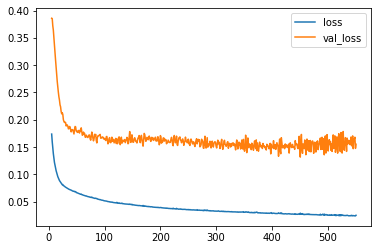

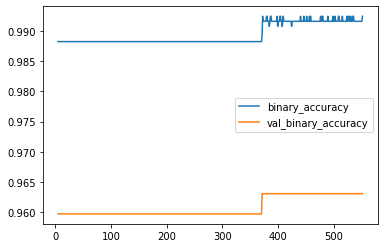

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

prediction_features = ["Rookie of the Year", "DPOY", "MVP", "FMVP", "PTS", "FGM", "AST", "FGA", "MIN", "FTM", "FTA", "REB", "BLK", "STL","TOV", "EFF","NBA_ft_per_g", "NBA_fta_p_g", "NBA_g_played", "NBA_ppg"]
X = withAwards2[prediction_features]
y = withAwards2["Hall of Fame Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 0)

#standardizing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[97  0]
 [ 4  1]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        97
         1.0       1.00      0.20      0.33         5

    accuracy                           0.96       102
   macro avg       0.98      0.60      0.66       102
weighted avg       0.96      0.96      0.95       102

0.9607843137254902


In [ ]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5) # Define the split - into 5 folds 

# Scikit-learn has a function that does the same thing as what we wrote previously.
from sklearn.model_selection import cross_val_score

scoresf1Micro = cross_val_score(
    classifier, X, y, cv=5, scoring='f1_micro'
)

scoresf1Macro = cross_val_score(
    classifier, X, y, cv=5, scoring='f1_macro'
)

scoresAccuracy =  cross_val_score(
    classifier, X, y, cv=5, scoring='accuracy'
)

print("f1 Micro:", scoresf1Micro)
print("f1 Macro: ", scoresf1Macro)
print("Accuracy: ", scoresAccuracy)

f1 Micro: [0.97058824 0.98529412 0.98039216 0.98039216 0.98039216]
f1 Macro:  [0.6175     0.82957393 0.745      0.66169154 0.745     ]
Accuracy:  [0.97058824 0.98529412 0.98039216 0.98039216 0.98039216]


In [ ]:
withAwards2['Hall of Fame Class'].value_counts()

0.0    994
1.0     26
Name: Hall of Fame Class, dtype: int64

In [ ]:
ncaae = Table.read_table('ncaa.csv')
halloffamerse = Table.read_table('HallOfFamers.csv')
new_ncaae = ncaae.drop("url", "position", "NCAA_efgpct", "Unnamed: 0", "active_from", "active_to", "birth_date", "college", "height", "NBA__3ptapg", "NBA__3ptpct", "NBA__3ptpg", "NBA_efgpct", "NBA_fg%", "NBA_fg_per_game", "NBA_fga_per_game", "NBA_ft%", "NBA_ft_per_g", "NBA_fta_p_g", "NBA_g_played", "NBA_ppg", "weight")

In [ ]:
all_halloffamerse = halloffamerse.column("Inductees")
all_ncaae = new_ncaae.column("name")
in_halloffame = "test" == all_ncaae

for name in all_halloffamerse:
    array_of_zero_or_ones = all_ncaae == name
    in_halloffame = np.add(in_halloffame, array_of_zero_or_ones)

In [ ]:
with_halloffame = new_ncaae.with_column("Hall of Fame", in_halloffame)
without_3pt = with_halloffame.where("NCAA__3ptapg", are.above_or_equal_to(0)).where("NCAA__3ptpct", are.above_or_equal_to(0)).drop("name")
without_ppg = with_halloffame.where("NCAA_ppg", are.above_or_equal_to(0)).drop("NCAA__3ptapg", "NCAA__3ptpct", "NCAA__3ptpg", "name")

In [ ]:
def player_distance(ncaa_stat1, ncaa_stat2):
    return np.sqrt(np.sum((ncaa_stat1 - ncaa_stat2)**2))

def all_player_distances(ncaa_training_set, ncaa_stat):
    attributes = ncaa_training_set.drop('Hall of Fame')
    def distance_from_player_stat(row):
        return player_distance(np.array(ncaa_stat), np.array(row))
    return attributes.apply(distance_from_player_stat)

def player_distances_table(ncaa_training_set, ncaa_stat):
    return ncaa_training_set.with_column('Distance', all_player_distances(ncaa_training_set, ncaa_stat))

def related_player(ncaa_training_set, ncaa_stat, k):
    with_dists = table_with_distances(ncaa_training_set, ncaa_stat)
    sorted_by_distance = with_dists.sort('Distance')
    most_related_players = sorted_by_distance.take(np.arange(k))
    return most_related_players

def hall_of_fame_or_not(most_related_players):
    hall_of_fame = most_related_players.where('Hall of Fame', are.equal_to(1)).num_rows
    hall_of_lame = most_related_players.where('Hall of Fame', are.equal_to(0)).num_rows
    if hall_of_fame > hall_of_lame:
        return 1
    else:
        return 0

def yes_or_no_hall_of_fame(ncaa_training_set, ncaa_stat, k):
    most_related_player = related_player(ncaa_training_set, ncaa_stat, k)
    fame_or_lame = most_related_player.select('Hall of Fame')
    return hall_of_fame_or_not(fame_or_lame)

def number_of_lames(list_of_hall):
    return len(list_of_hall) - np.count_nonzero(list_of_hall)

def numer_of_correct_predictions(yesses_and_nos, ncaa_test_set):
    return number_of_lames(yesses_and_nos - ncaa_test_set)

def evaluate_accuracy(ncaa_training_set, ncaa_test_set, k):
    ncaa_player_stats = ncaa_test_set.drop('Hall of Fame')
    def yes_or_no(row):
        return yes_or_no_hall_of_fame(ncaa_training_set, row, k)
    yesses_and_nos = ncaa_player_stats.apply(yes_or_no)
    return numer_of_correct_predictions(yesses_and_nos, ncaa_test_set.column('Hall of Fame')) / ncaa_test_set.num_rows

In [ ]:
shuffled_without_3pt = without_3pt.sample(with_replacement=False) 
training_set_3pt = shuffled_without_3pt.take(np.arange(858))
test_set_3pt = shuffled_without_3pt.take(np.arange(858, 1726))

shuffled_without_ppg = without_ppg.sample(with_replacement=False) 
training_set_ppg = shuffled_without_ppg.take(np.arange(1299))
test_set_ppg = shuffled_without_ppg.take(np.arange(1299, 2598))

In [ ]:
evaluate_accuracy(training_set_3pt, test_set_3pt, 1)

0.9838709677419355

In [ ]:
evaluate_accuracy(training_set_ppg, test_set_ppg, 1)

0.947652040030793